In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

vsync on, rects not in corner

In [9]:
PATH = "../data/vsync_on/211123_measurements"

In [10]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['02b20a19-1655-4b23-b35d-aa55e9f2e5ac.csv',
 '032aaf2e-a337-42b9-afbd-508c18d17dc6.csv',
 '032e0632-2b16-4dad-92a8-12c16e18d17d.csv',
 '048bdc5f-8070-4e7a-9493-f2007c624181.csv',
 '095298b2-eb02-4bf2-9711-a06a2b4f64d6.csv',
 '0d3891d7-855e-40a6-a6f7-351c04694326.csv',
 '0d9d9fd5-15da-40c9-94da-dcaa03accba4.csv',
 '0dceb53d-0564-4cd3-ba54-df3909949232.csv',
 '117e57f2-cc71-411e-a5dc-a44e4a218ab3.csv',
 '127b6464-7c38-4ca0-98d4-6197c6ef101c.csv',
 '13afd4b2-6690-4089-ad59-60c0b706ee76.csv',
 '13b7b275-cff8-47dd-85aa-a8fa4564e80c.csv',
 '19143924-1db9-4d75-a181-bc4f6d701890.csv',
 '1b39bf54-e312-47db-9088-9d001cac4ce2.csv',
 '1cfa97c3-c405-44e6-98a6-ebf2307321a0.csv',
 '1d78a812-7d31-434e-9553-c089feb7cb33.csv',
 '1db85ab1-9932-4aa2-9e59-4b172f922ed1.csv',
 '1f08da34-62dc-4c3a-9244-b7c2516ca6f1.csv',
 '242f38d0-1da9-4bed-b8da-14eb703b84b1.csv',
 '250cf382-666a-4117-832c-577888824e9e.csv',
 '251e8081-da7f-44e1-aa55-d59a7a6b62bc.csv',
 '25a60381-a336-4265-bf2d-4705693201f4.csv',
 '27ebb578

In [11]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [12]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
data_clean = data_raw.loc[~((data_raw['program'] == 'windup_python') & (data_raw['framework'].str.contains('GL')))]

In [13]:
data = data_clean

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\4173412873.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


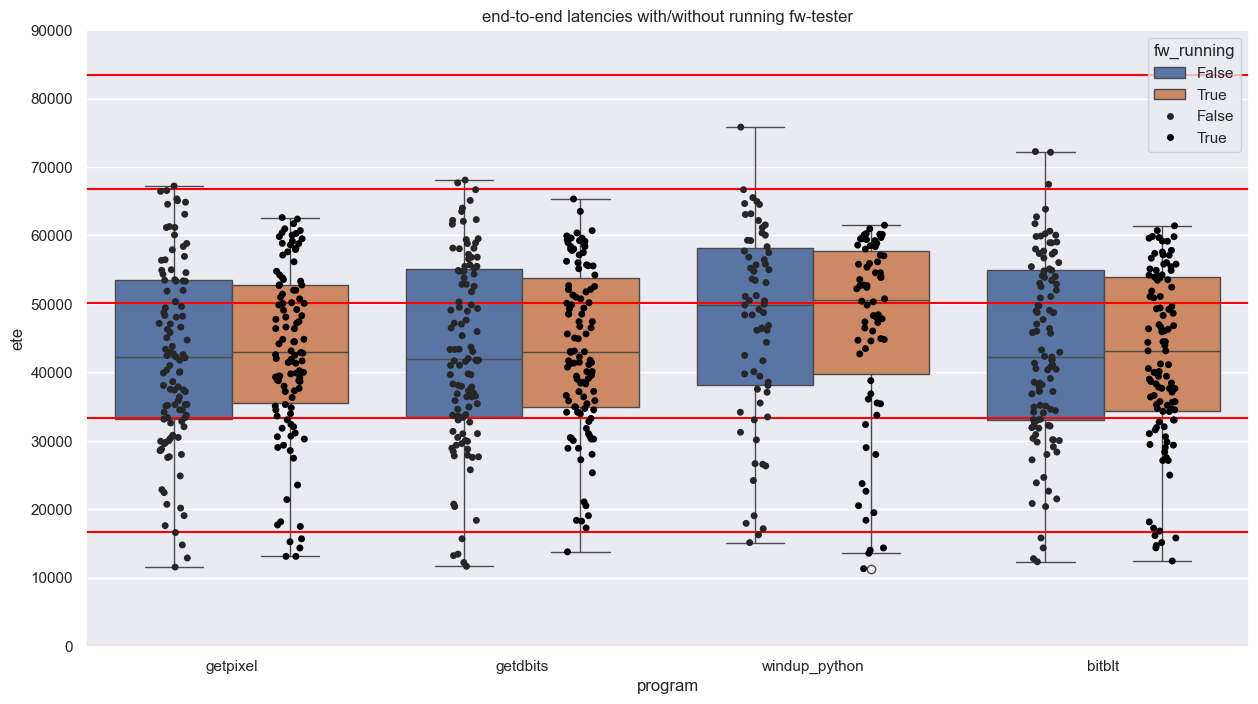

In [14]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 90000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\3384622468.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


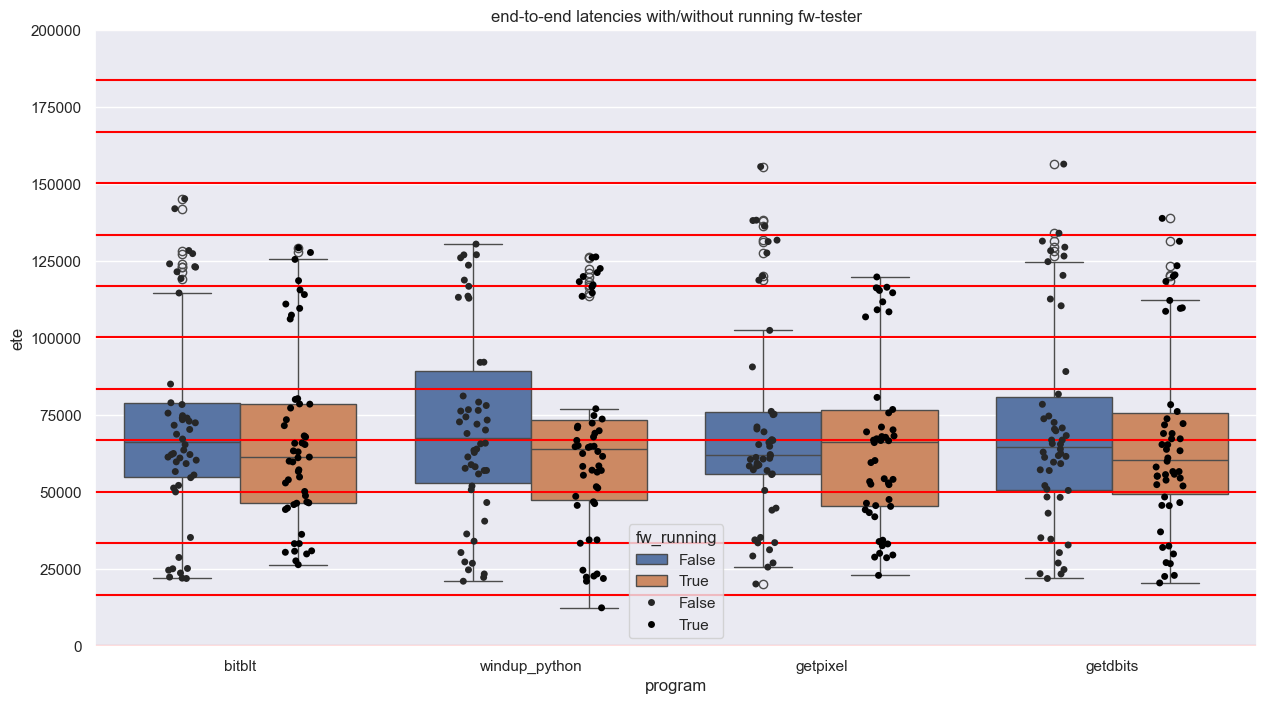

In [15]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 200000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\1753498729.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 25000.0)

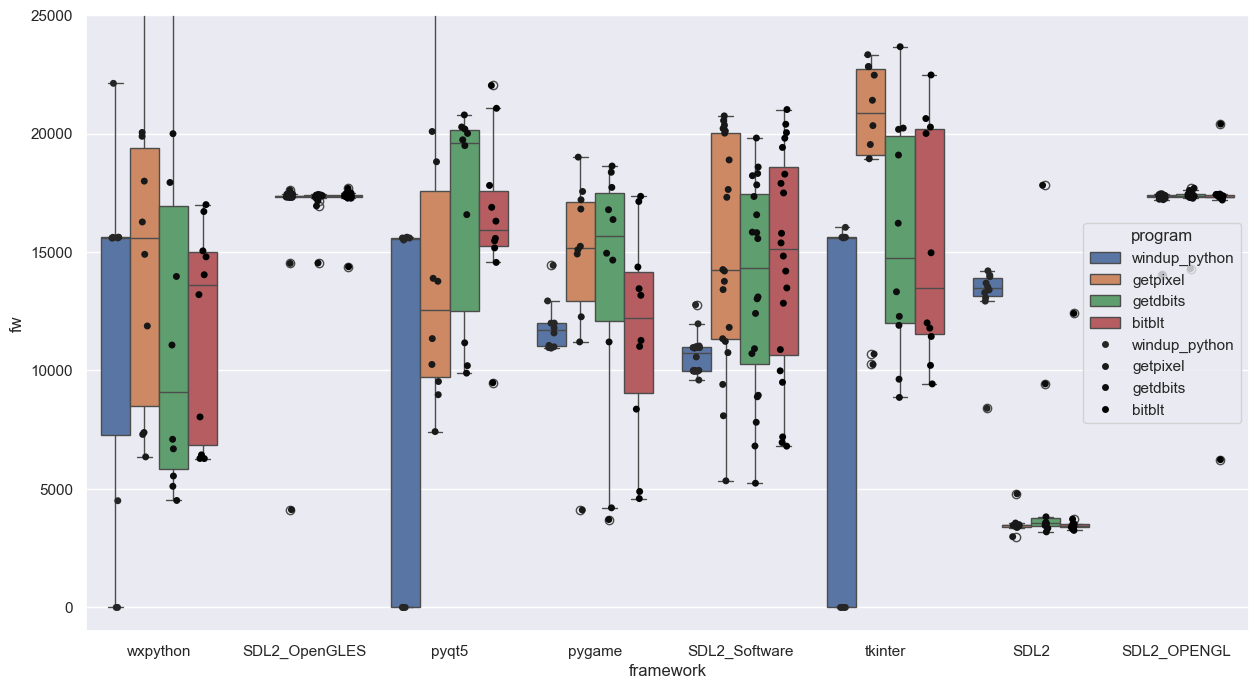

In [16]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 25000)

### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\84911319.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 100000.0)

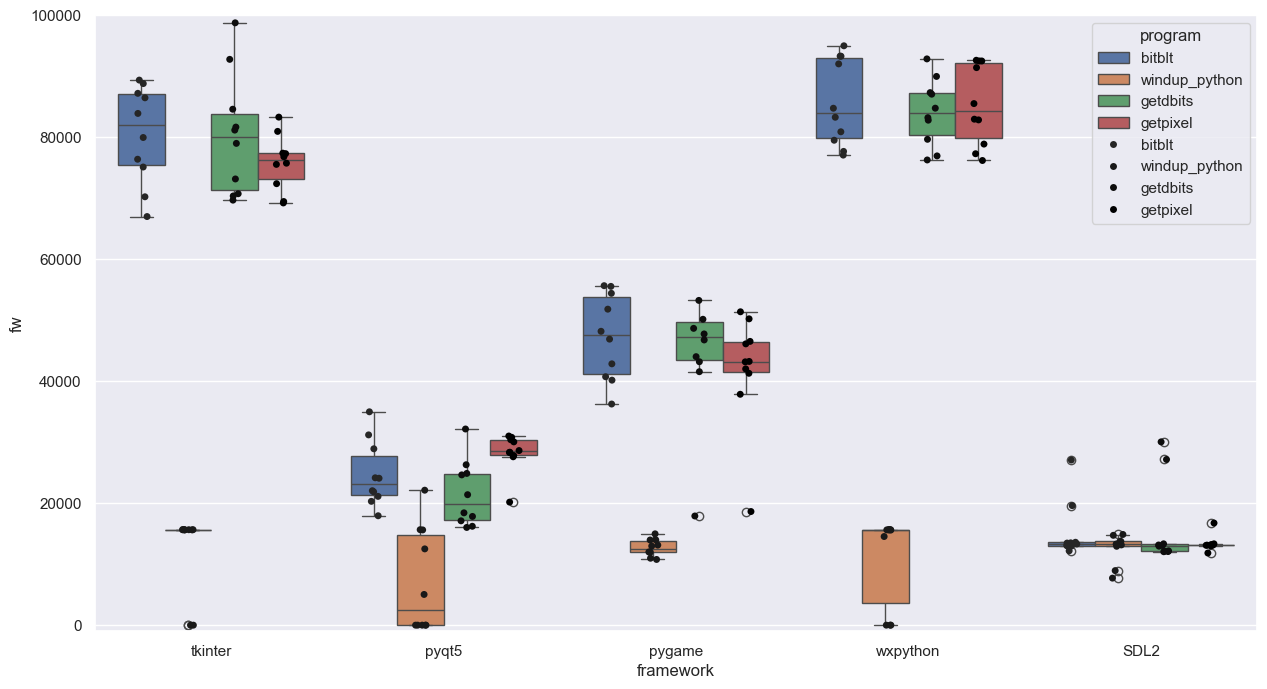

In [17]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 100000)

### Framework latency by complexity

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\3399512195.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


(-5000.0, 150000.0)

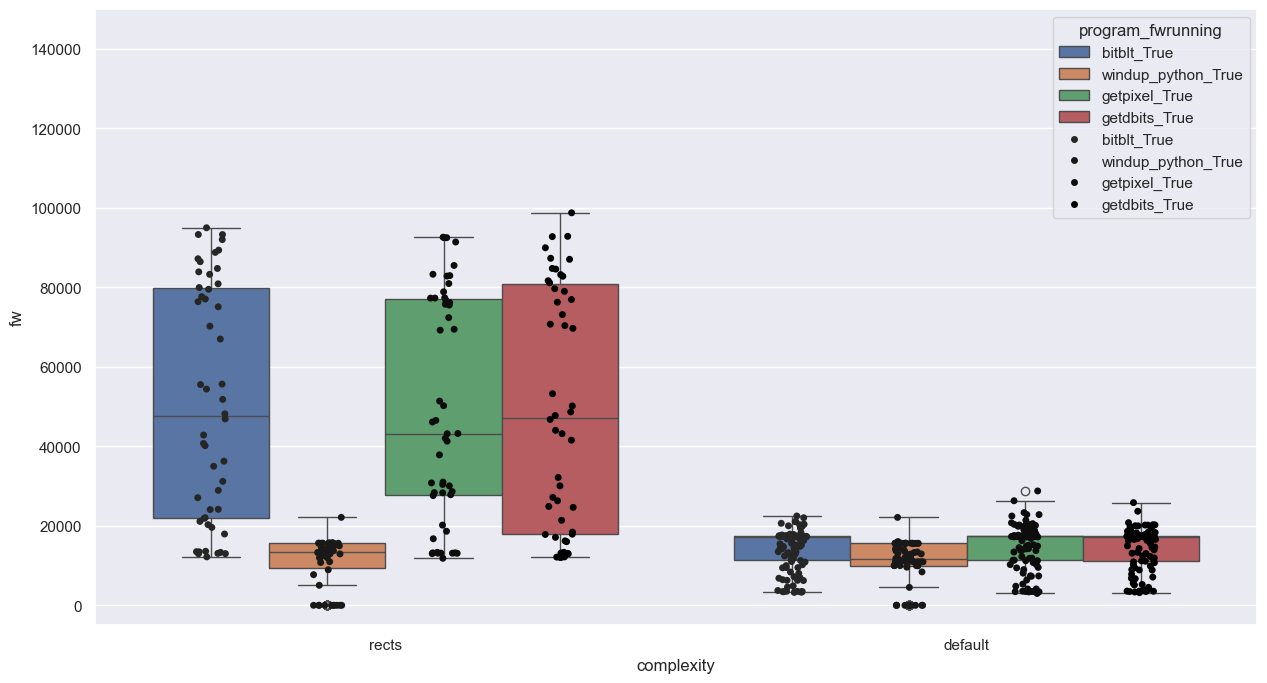

In [18]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

### Framework latency by framework

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\3932135016.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


(-5000.0, 150000.0)

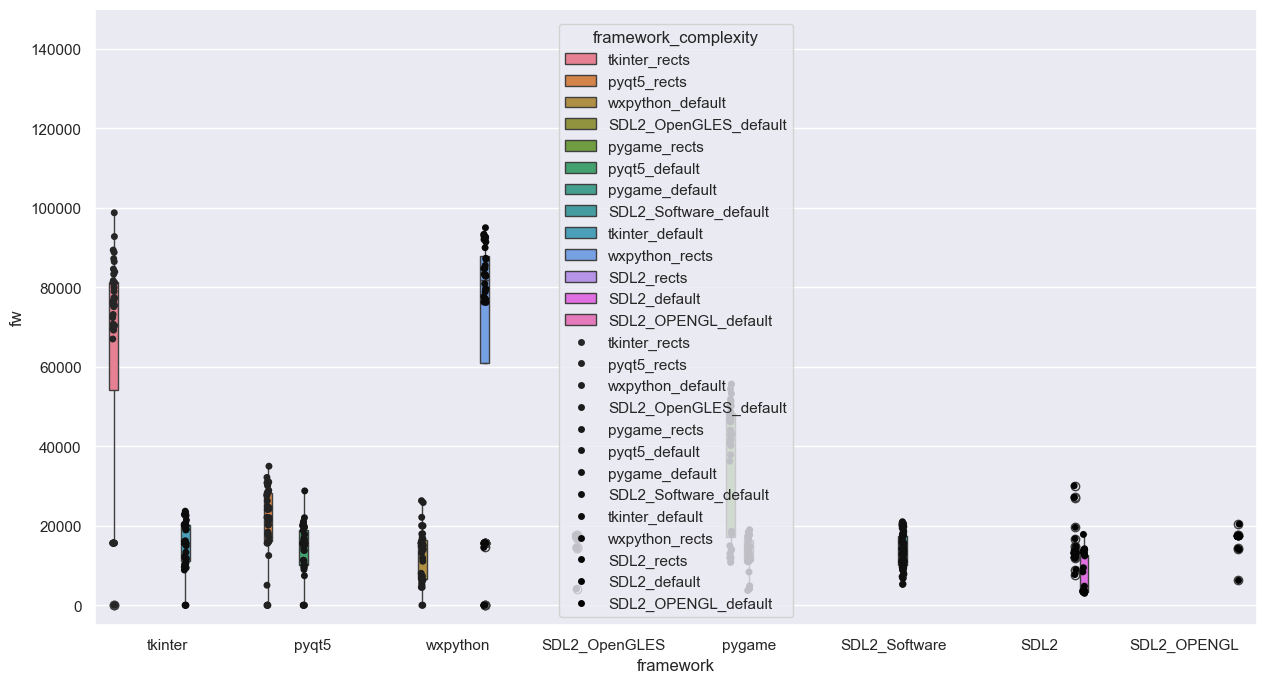

In [19]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))
ax = plt.gca()
ax.set_ylim(-5000, 150000)

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\594577958.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


(-5000.0, 150000.0)

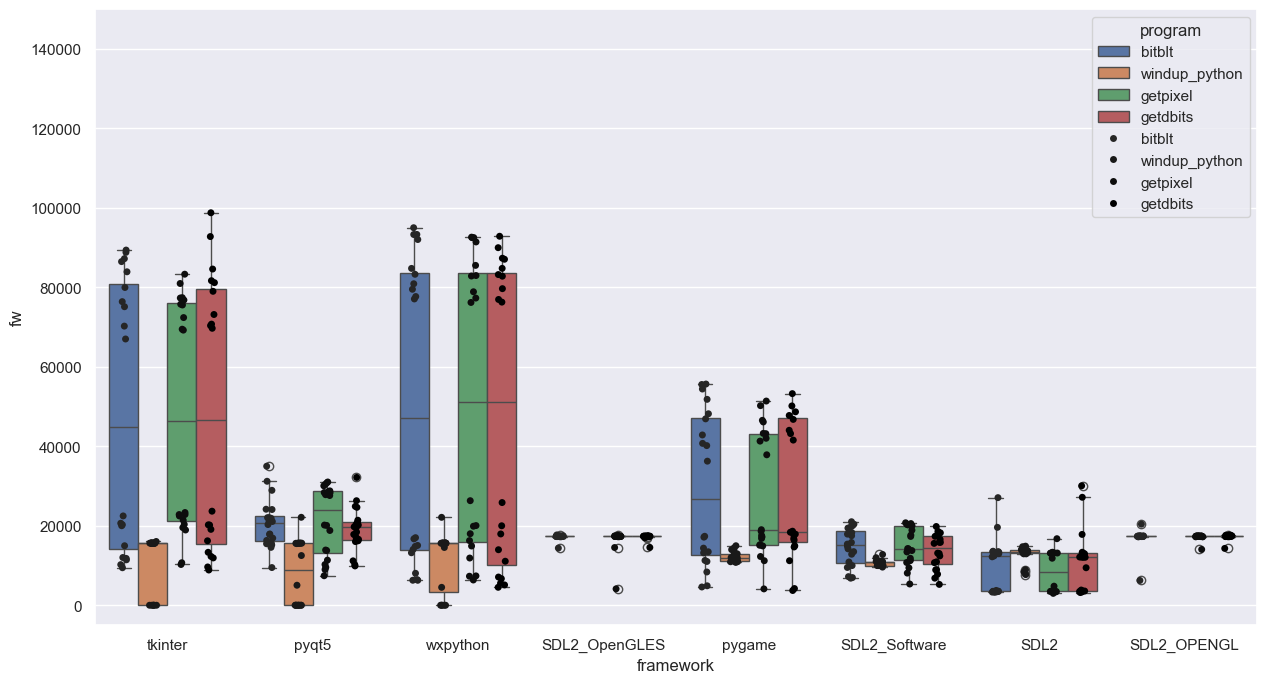

In [20]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\3421617578.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 100000.0)

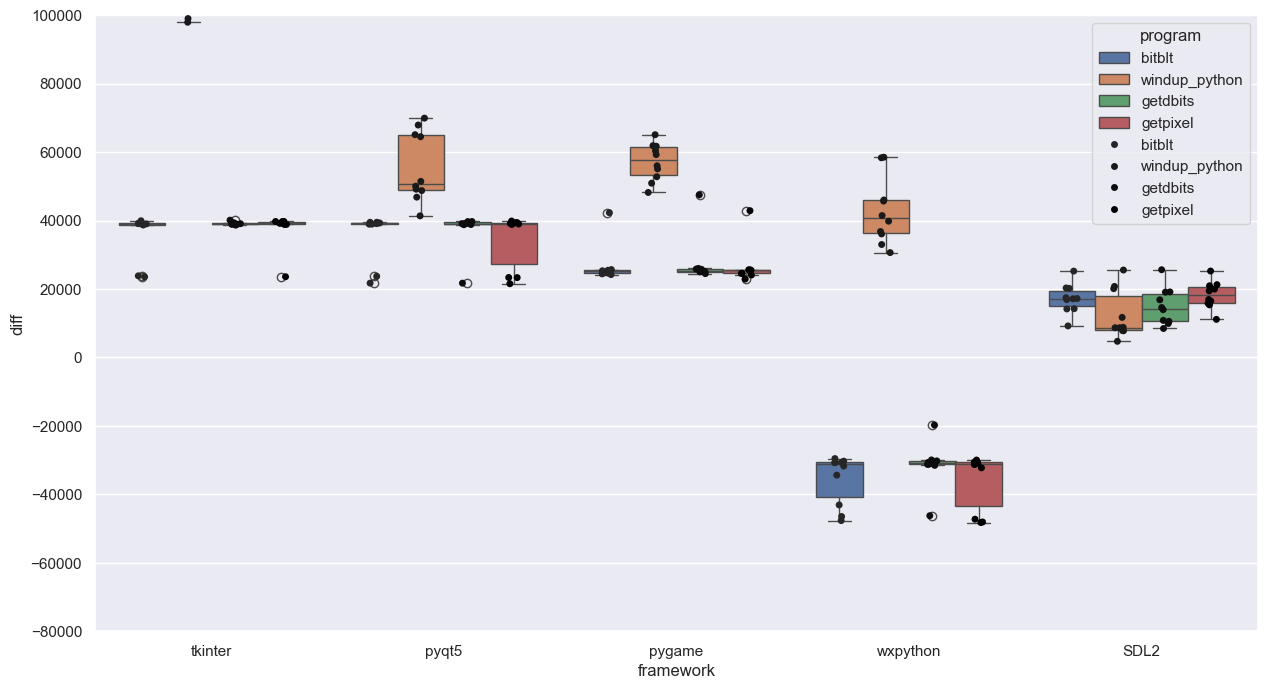

In [21]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 100000)

### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_2264\605666535.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 80000.0)

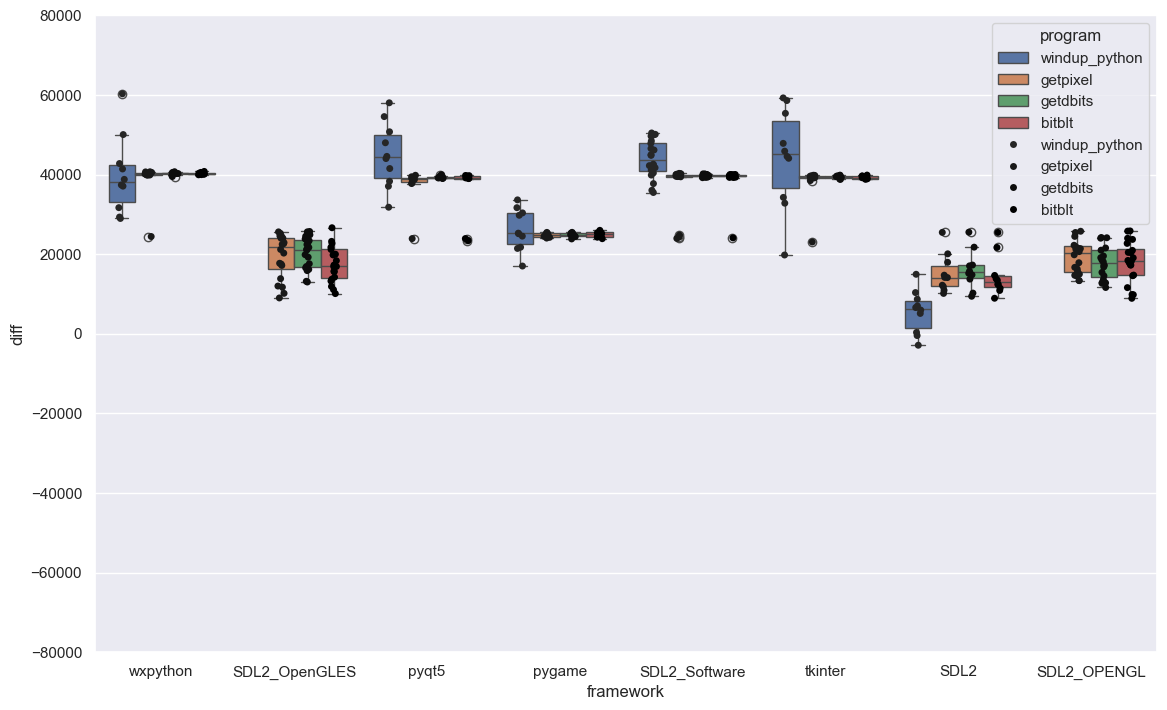

In [22]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 80000)

(-80000.0, 80000.0)

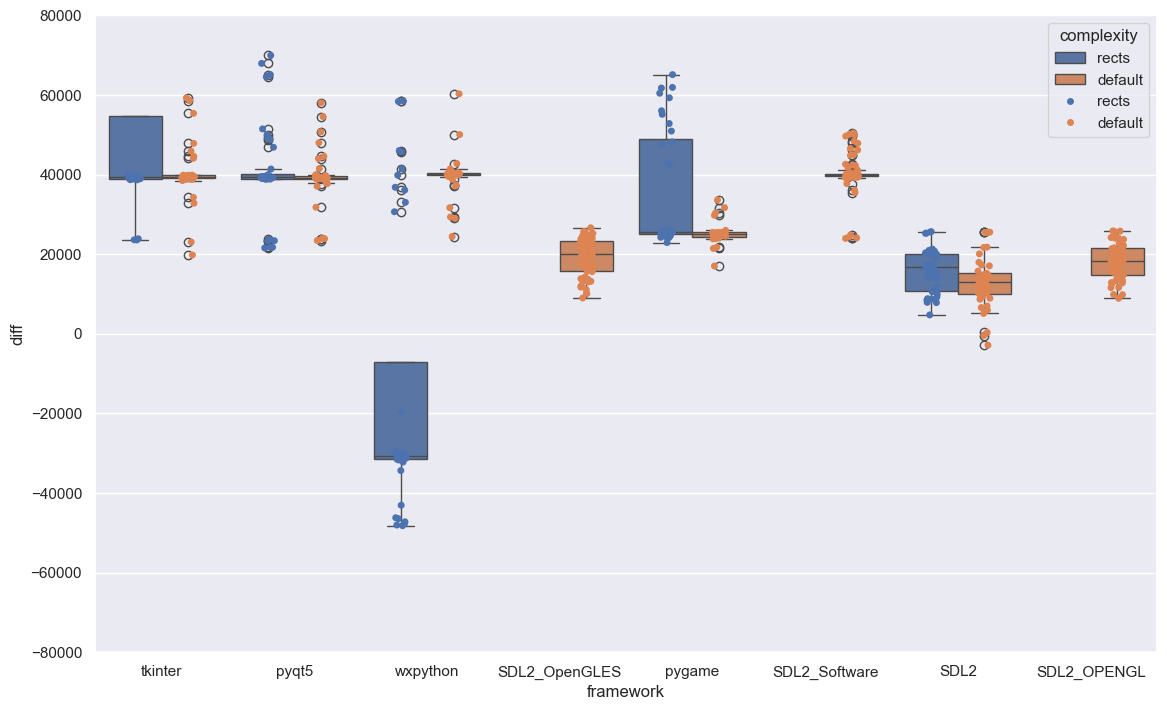

In [23]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)
ax = plt.gca()
ax.set_ylim(-80000, 80000)